2026-02-05

# 学習内容
### 書籍/教材:スッキリわかるPythonによる機械学習入門
### 範囲: 第10章 より実践的な前処理
### 目的: 実践的な前処理を学ぶ

 -----------------------------
## <関数まとめ>
・pd.read_csv('tsvファイル名', sep = '\t')  
・pd.read_csv('tsvファイル名', encoding = '文字コード名')  
・pd.read_json('jsonファイル')   
・df.T  
・df = df.merge(内部結合するデータフレーム, how = 'inner', on = '結合キー')  
・df = df.merge(外部結合するデータフレーム, how = 'left', on = '結合キー')  
・df['列名'].plot(kind = 'line')  
・df['列名'].plot(kind = 'hist', alpha = 値)  
・df['列名'].astype(データ型名)  
・df['列名'].interpolate()  
・df.describe()  
・df1 = 共分散行列.mahalanobis(df2)  
・pyplot.savefit('ファイル名.png')  




 -----------------------------
## <内容まとめ>  

・**tsvファイルの読み込み**
tsvファイルはカンマではなくtabで区切られている。tsvファイルを読み込むには、read_csv関数の引数にsep = '\t'を追加する。  
```python
df = pd.read_csv('tsvファイル名', sep = '\t')
```
・**文字コードの指定**
pandasのread_csv関数はデフォルトでUTF-8に従ったファイルだとみなして動作するため、UTF-8以外のファイルを読み込もうとするとUnicodeDecodeErrorが起きる。そのためread_csv関数の引数を追加する。
```python
df = pd.read_csv('ファイル名', encoding = '文字コード名')
```

・**JSONファイル**
JSONファイルはディクショナリ型と似ており、キーとバリューの構造でデータを管理しているファイル。キーはデータフレームで読み込んだ時のインデックスとなる。バリューにはリストを利用することもできる。**JSONファイルを駆使することで、柔軟にデータ管理の構造を決めることができる。**  
JSOFファイルはread_json関数で読み込むことができる。
```python
df = pd.read_json('temp.json')
```

・**データフレームの行と列の反転**  
read_json関数などによって、行と列が反転してしまうことがある。そのようなときはデータフレーム.Tとすることで、行と列を反転できる。データフレームの行と列を反転させることを**転置**という。
```python
df.T
```

・**内部結合**
二つのデータフレームを結合する手段としてconcat関数があった。これとは異なり、二つのデータフレームの共通の列を基準として、同じ値の行同士を結合する方法を**内部結合**という。内部結合では二つのデータフレームの行数が同じ必要はない。また結合する際の基準となる列を**結合キー**と呼ぶ。  
pandasでは**merge関数**を使うことで内部結合ができる。
```python
df = df.merge(dfと結合するデータフレーム, how = 'inner', on = '結合キー')
```

・**外部結合**  
内部結合では、結合対象となるデータフレームに対応する行がなかった場合、結合できなかった行は結合結果から削除されてしまう。**外部結合**では、結合できない行の空欄となるところを欠損値として扱うことで、結合できない行を残しておくことができる。  
merge関数の引数パラーメータを変えることで外部結合できる。
```python
df = df.merge(外部結合するデータフレーム, how = 'left', on = '結合キー')
```

・**折れ線グラフ**
```python
df['~'].plot(kind = 'line')

#複数列を折れ線グラフにする
df[['~','~']].plot(kind = 'line')
```

・**ヒストグラム**
```python
df['~'].plot(kind = 'hist')
# 引数alphaでヒストグラムの色の濃淡を0~1で調整
df['~'].plot(kind = 'hist', alpha = 0.5)
```

・**線形補間**  
時系列データの欠損値を補間する際は、**線形補間**が有効である。線形補間とは、欠損値の前後のデータに対して直線を引いて、欠損しない本来の値を予測すること。  
欠損値の線形補間はinterpolateメソッドを使う。またinterpolateメソッドは補間するデータ型がオブジェクト型だと補間しないようになっているため、オブジェクト型の場合はastypeメソッドを利用して列内のデータ型を変換する必要がある。
```python
df[列名].astype(データ型名)
df[列名].interpolate()
```

・**教師あり学習による補間**  
欠損値のある列を予測するモデルを作成することで、平均値や中央値で補間するよりも精度の高い欠損値補間をすることができる可能性が高い。

・**より高度な外れ値の処理**  
データの距離を計算することで、ロジカルに外れ値を特定する。そこで**マハラノビス距離**を計算する。
```python
from sklearn.covariance import MinCocDet
df4 = df3.loc[:, 'atemp':'windspeed']
df4 = df4.dropna()
mcd = MinCovDet(random_state = 0, support_fraction = 0.7)
# マハラノビス距離を計算するのに必要な共分散行列を計算
mcd.fit(df4)
#マハラノビス距離
distance = mcd.mahalanobis(df4)
distance
```
以上のような手順でマハラノビス距離を求められる。次に中央値を用いて閾値を決定する。
(IQR = 四分位範囲 = 第3四分位数 - 第1四分位数)  
**・値が大きい側の外れ値の閾値 = 第3四分位数 + 1.5 × IQR**  
**・値が小さい側の外れ値のの閾値 = 第1四分位数 - 1.5 × IQR**  

・**箱ひげ図**  
箱ひげ図を描画して外れ値があるかどうかを知ることが可能。  
```python
distance = pd.Series(distance)
distance.plot(kind = 'box')
```

・**describeメソッドにより基本統計量の計算**  
describeメソッドは代表的な基本統計量をシリーズやデータフレームとして出力してくれるメソッド。この中に第一四分位数と第三四分位数のデータがあるのでこれを利用して外れ値の判定を行う。
```python
tmp = distance.describe()
```

```python
# 外れ値の判定
iqr = tmp['75%'] -tmp['25%'] # IQR計算
jougen = 1.5 * (iqr) + tmp['75%'] #上限値
kagen = tmp['25%'] - 1.5 * (iqr) #下限値
# 上限と下限をもとに、シリーズで条件検索
outliner = distance[(distance > jougen) | (distance < kagen)]
outliner
```
これでマハラノビス距離による外れ値の処理をすることができた。  


・**dtypeによるデータ型の確認**  
シリーズ.dtypeと指定することで、データ型を確認できる。
```python
se = pd.Series([1,2,3,4])
print(se.dtype)
```

・**グラフの保存**  
savefigメソッドでグラフを保存できる。
```python
import matplotlib.pyplot as plt
df4.plot(kind = 'scatter', x = 'atemp', y = 'hum')
plt.savefib('test0.png') # pngファイルとして保存
```

・**subplotsによる分割**  
一枚の画像ファイルの中にグラフを複数個いれることができる。  
```python
import matplotlib.pyplot as plt
# 1枚の画像を2行2列に分割、サイズは縦が6、横が10
fig,axs = plt.subplots(2, 2, figsize = (10, 6))

# 画像内の0行0列の位置に配置
df4.plot(kind = 'scatter', x = 'atemp', y = 'hum', ax = axs[0,0])
# 画像内の1行1列の位置に配置
df4.plot(kind = 'scatter', x = 'temp', y = 'hum', ax = axs[1,1])
plt.savefig('test1.png')
```




 -----------------------------
## まとめ

・tsvファイルの読み込み、文字コードの指定、JSONファイルの読み込みについて学んだ。  

・内部結合、外部結合を用いて複数のデータフレームを結合できる。  

・時系列データの場合、線形補間で欠損値を穴埋めすることができる。  

・欠損値のある列を正解データとした予測モデルを作って、欠損値の値の予測に用いることができる。  

・マハラノビス距離を用いて外れ値を判定できる。  

--------------------------------------
## 以下は実装例

In [16]:
import pandas as pd
df = pd.read_csv('chap10/bike.tsv')
df.head()

,dteday\tholiday\tweekday\tworkingday\tweather_id\tcnt
0,2011-01-01\t0\t6\t0\t2\t985
1,2011-01-02\t0\t0\t0\t2\t801
2,2011-01-03\t0\t1\t1\t1\t1349
3,2011-01-04\t0\t2\t1\t1\t1562
4,2011-01-05\t0\t3\t1\t1\t1600


In [17]:
# tsvファイルではtabキーで区切られてるので、sep = '\t'という引数を追加する。
df = pd.read_csv('chap10/bike.tsv', sep = '\t')
df.head()

,dteday,holiday,weekday,workingday,weather_id,cnt
0,2011-01-01,0,6,0,2,985
1,2011-01-02,0,0,0,2,801
2,2011-01-03,0,1,1,1,1349
3,2011-01-04,0,2,1,1,1562
4,2011-01-05,0,3,1,1,1600


weather = pd.read_csv('chap10/weather.csv')

pandasのread_csv関数は、デフォルトではUTF-8に従ったファイルとみなして動作する。weather.csvファイルはUTF-8ではなくshift-jisに従って作成されているため、上記のようにUnicodeDecodeErrorが起きてしまう。そこで、文字コードを指定する。

In [18]:
weather = pd.read_csv('chap10/weather.csv', encoding = 'shift-jis')
weather

,weather_id,weather
0,1,晴れ
1,2,曇り
2,3,雨


In [19]:
# jsonファイルの読み込み
temp = pd.read_json('chap10/temp.json')
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,720,721,722,723,724,725,726,727,728,729
atemp,0.363625,0.353739,0.189405,0.212122,0.22927,0.233209,0.208839,0.162254,0.116175,0.150888,...,0.236113,0.259471,0.2589,0.294465,0.220333,0.226642,0.255046,0.2424,0.2317,0.223487
dteday,2011-01-01,2011-01-02,2011-01-03,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-08,2011-01-09,2011-01-10,...,2012-12-22,2012-12-23,2012-12-24,2012-12-25,2012-12-26,2012-12-27,2012-12-28,2012-12-29,2012-12-30,2012-12-31
hum,0.805833,0.696087,0.437273,0.590435,0.436957,0.518261,0.498696,0.535833,0.434167,0.482917,...,0.44125,0.515417,0.791304,0.734783,0.823333,0.652917,0.59,0.752917,0.483333,0.5775
temp,0.344167,0.363478,0.196364,0.2,0.226957,0.204348,0.196522,0.165,0.138333,0.150833,...,0.265833,0.245833,0.231304,0.291304,0.243333,0.254167,0.253333,0.253333,0.255833,0.215833
windspeed,0.160446,0.248539,0.248309,0.160296,0.1869,0.089565,0.168726,0.266804,0.36195,0.223267,...,0.407346,0.133083,0.07723,0.168726,0.316546,0.350133,0.155471,0.124383,0.350754,0.154846


read_json関数の仕様により、上記のように行と列が逆転してしまった。temp.Tで行と列を反転させる。

In [20]:
temp.T

,atemp,dteday,hum,temp,windspeed
0,0.363625,2011-01-01,0.805833,0.344167,0.160446
1,0.353739,2011-01-02,0.696087,0.363478,0.248539
2,0.189405,2011-01-03,0.437273,0.196364,0.248309
3,0.212122,2011-01-04,0.590435,0.2,0.160296
4,0.22927,2011-01-05,0.436957,0.226957,0.1869
...,...,...,...,...,...
725,0.226642,2012-12-27,0.652917,0.254167,0.350133
726,0.255046,2012-12-28,0.59,0.253333,0.155471
727,0.2424,2012-12-29,0.752917,0.253333,0.124383
728,0.2317,2012-12-30,0.483333,0.255833,0.350754


In [21]:
# ２つのデータフレームをmerge関数で一つにする。
df2 = df.merge(weather, how = 'inner', on = 'weather_id')
df2 = df2.sort_values(by='dteday')
df2.head()

,dteday,holiday,weekday,workingday,weather_id,cnt,weather
0,2011-01-01,0,6,0,2,985,曇り
1,2011-01-02,0,0,0,2,801,曇り
2,2011-01-03,0,1,1,1,1349,晴れ
3,2011-01-04,0,2,1,1,1562,晴れ
4,2011-01-05,0,3,1,1,1600,晴れ


In [22]:
df2.groupby('weather')['cnt'].mean()

weather
晴れ    4876.786177
曇り    4052.672065
雨     1803.285714
Name: cnt, dtype: float64

In [28]:
# 次にtempデータフレームと外部結合する。
temp = temp.T
df3 = df2.merge(temp,how="left",on="dteday")
df3[df3["dteday"]=='2011-07-20']

,dteday,holiday,weekday,workingday,weather_id,cnt,weather,atemp,hum,temp,windspeed
200,2011-07-20,0,3,1,1,4332,晴れ,NaN,NaN,NaN,NaN


<Axes: ylabel='Frequency'>

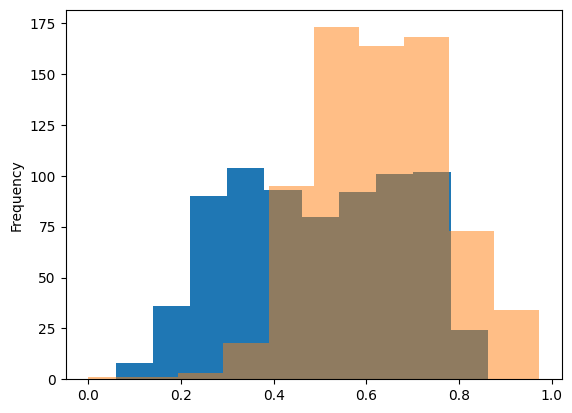

In [32]:
df3['temp'].plot(kind = 'hist')
df3['hum'].plot(kind = 'hist', alpha = 0.5)

<Axes: ylabel='Frequency'>

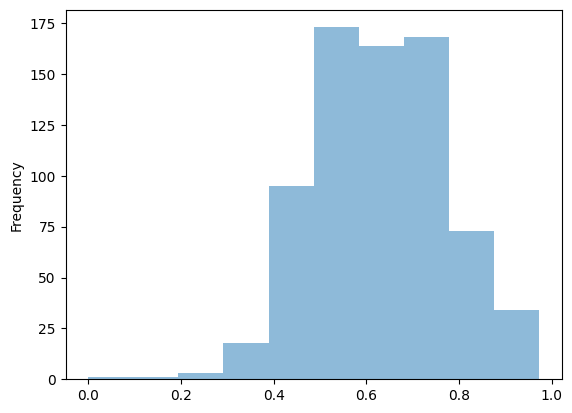

In [31]:
df3['hum'].plot(kind = 'hist', alpha = 0.5)

<Axes: >

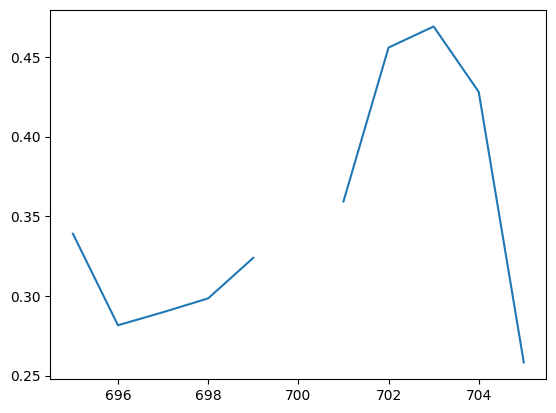

In [39]:
df3['atemp'].loc[695:705].plot(kind = 'line')

<Axes: >

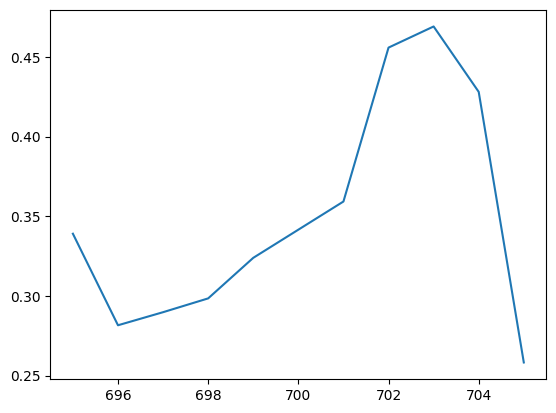

In [41]:
# 線形補間
df3['atemp'] = df3['atemp'].astype(float)
df3['atemp'] = df3['atemp'].interpolate()

df3['atemp'].loc[695:705].plot(kind = 'line')